In [ ]:
# @author: Josiah Kimani
# @date: 2025-06-12
# @description: This script installs the required packages
# Sklearn version 1.7.0 supports normalized stress for metric MDS while earlier versions dont.
# Restart session
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [ ]:
# Verify the installation
import sklearn
print(sklearn.__version__)

1.7.0


In [ ]:
# @title Drive
# Mount Google Drive to access data and save plots
from google.colab import drive
drive.mount('/content/drive')

# Define paths for data and plots
# Ensure these paths exist in your Google Drive
data_drive_path = "/content/drive/MyDrive/MastersProject/Data/"
data_drive_plot = "/content/drive/MyDrive/MastersProject/Plots/"



Mounted at /content/drive


In [ ]:
# @title Import Libraries
# Import necessary libraries for data processing, analysis, and visualization

# Data processing and analysis
import xarray as xr
import numpy as np
import pandas as pd
import joblib

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Aesthetics
sns.set_theme(style="whitegrid")
plt.rc('axes', titlesize=12, labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
# @title Loading Data
# Load the merged datasets from the specified path
# Ensure the file exists in the specified path
merged_datasets = joblib.load(data_drive_path+ "aiwp_ml_setup_500geopotential_32x64_2020_leadtime72.pkl").drop(columns=["area_weight","keisler"])
print(f"Merged_datasets size:{merged_datasets.shape} ")
merged_datasets.head()

Merged_datasets size:(1499136, 7) 


,time,longitude,latitude,graphcast,pangu,neuralgcm,ifshres
0,2020-01-04,0.0,-87.1875,49969.980469,49928.015625,50061.421875,50103.640625
1,2020-01-04,0.0,-81.5625,50197.351562,50232.875000,50227.707031,50357.289062
2,2020-01-04,0.0,-75.9375,50326.664062,50367.367188,50305.351562,50433.640625
3,2020-01-04,0.0,-70.3125,50008.304688,50005.089844,49969.562500,50055.031250
4,2020-01-04,0.0,-64.6875,49281.628906,49232.839844,49214.851562,49303.812500


In [ ]:
# Load the ERA5 dataset from the specified path
# Ensure the file exists in the specified path
era5_dataset = joblib.load(data_drive_path+ "era5_ml_setup_500geopotential_32x64_2020.pkl")
print(f"era5_dataset size:{era5_dataset.shape} ")
era5_dataset.head()

era5_dataset size:(1556480, 5) 


,time,longitude,latitude,era5,area_weight
0,2020-01-01,0.0,-87.1875,49846.941406,0.049068
1,2020-01-01,0.0,-81.5625,50196.523438,0.146730
2,2020-01-01,0.0,-75.9375,50391.101562,0.242980
3,2020-01-01,0.0,-70.3125,49667.398438,0.336890
4,2020-01-01,0.0,-64.6875,49277.945312,0.427555


In [ ]:
# @title Merge Forecasts and Era5
# Merge the merged datasets with the ERA5 dataset on time, longitude, and latitude
# Ensure the columns 'time', 'longitude', and 'latitude' are present in both datasets

#merged_datasets = merged_datasets.rename(columns={col: col + "_lt72" for col in merged_datasets.columns if col not in ["time", "longitude", "latitude"]})
df = era5_dataset.merge(merged_datasets, on=["time", "longitude", "latitude"], how="outer")

print(f"Dataframe size: {df.shape}")
df.head()

Dataframe size: (1556480, 9)


,time,longitude,latitude,era5,area_weight,graphcast,pangu,neuralgcm,ifshres
0,2020-01-01,0.0,-87.1875,49846.941406,0.049068,NaN,NaN,NaN,NaN
1,2020-01-01,0.0,-81.5625,50196.523438,0.146730,NaN,NaN,NaN,NaN
2,2020-01-01,0.0,-75.9375,50391.101562,0.242980,NaN,NaN,NaN,NaN
3,2020-01-01,0.0,-70.3125,49667.398438,0.336890,NaN,NaN,NaN,NaN
4,2020-01-01,0.0,-64.6875,49277.945312,0.427555,NaN,NaN,NaN,NaN


In [ ]:
# @title Check for Missing Values
# Check for missing values in the merged dataframe
df.isna().sum()


,0
time,0
longitude,0
latitude,0
era5,0
area_weight,0
graphcast,57344
pangu,57344
neuralgcm,57344
ifshres,57344


In [ ]:
# @title Drop Rows with Missing Values
# Drop rows with any missing values in the dataframe
df_not_null = df.dropna()

In [10]:
df_not_null.head()

,time,longitude,latitude,era5,area_weight,graphcast,pangu,neuralgcm,ifshres
12288,2020-01-04,0.0,-87.1875,50122.613281,0.049068,49969.980469,49928.015625,50061.421875,50103.640625
12289,2020-01-04,0.0,-81.5625,50243.335938,0.146730,50197.351562,50232.875000,50227.707031,50357.289062
12290,2020-01-04,0.0,-75.9375,50384.082031,0.242980,50326.664062,50367.367188,50305.351562,50433.640625
12291,2020-01-04,0.0,-70.3125,50042.835938,0.336890,50008.304688,50005.089844,49969.562500,50055.031250
12292,2020-01-04,0.0,-64.6875,49216.960938,0.427555,49281.628906,49232.839844,49214.851562,49303.812500


### Calculate RMSE to compare to values on [WB2 website](https://sites.research.google/weatherbench/deterministic-scores/)



In [ ]:
# @title Calculate Pairwise RMSE
# This function calculates the pairwise RMSE between specified columns in a DataFrame.
def calculate_pairwise_rmse(df, columns):
    """Calculates the pairwise RMSE between specified columns in a DataFrame.

    Args:
      df: The input DataFrame.
      columns: A list of column names to calculate RMSE for.

    Returns:
      A pandas DataFrame representing the pairwise RMSE matrix.
    """

    n = len(columns)
    rmse_matrix = pd.DataFrame(index=columns, columns=columns)

    for i in range(n):
      for j in range(i, n):  # Only calculate upper triangle, as it is symmetric
          col1 = columns[i]
          col2 = columns[j]

          rmse = np.sqrt(((df[col1] - df[col2])**2 * df["area_weight"]).mean() / df["area_weight"].mean())
          rmse_matrix.loc[col1, col2] = rmse
          rmse_matrix.loc[col2, col1] = rmse # Assign to the lower triangle as well

    return rmse_matrix



In [ ]:
# @title Calculate Pairwise RMSE for Selected Columns
# Specify the columns for which to calculate pairwise RMSE
columns_to_calculate = [ 'era5','graphcast', 'pangu', 'neuralgcm','ifshres']
pairwise_rmse_result = calculate_pairwise_rmse(df_not_null, columns_to_calculate)
pairwise_rmse_result

,era5,graphcast,pangu,neuralgcm,ifshres
era5,0.0,115.160156,125.908476,104.454006,124.894767
graphcast,115.160156,0.0,105.998268,102.279047,113.080117
pangu,125.908476,105.998268,0.0,104.273869,119.072937
neuralgcm,104.454006,102.279047,104.273869,0.0,111.085068
ifshres,124.894767,113.080117,119.072937,111.085068,0.0


In [ ]:
# @title Convert Data Types and Create Mask
# Convert the pairwise RMSE result to numeric, handling errors by coercing them to NaN
pairwise_rmse_result = pairwise_rmse_result.apply(pd.to_numeric, errors='coerce')
# Create a mask for the upper triangle excluding the main diagonal
mask = np.triu(np.ones_like(pairwise_rmse_result, dtype=bool),k=1)

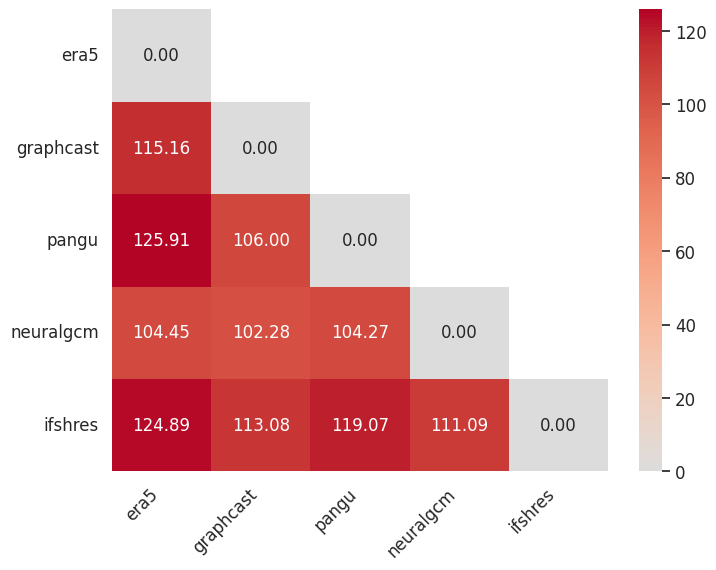

In [ ]:
# @title Plot Pairwise RMSE Heatmap
# This function plots a heatmap of the pairwise RMSE results with annotations.
def pairwise_rmse_heatmap(rmse_result, mask, save_path):
  plt.rcParams['axes.titlesize'] = 14
  # plt.rcParams['axes.labelsize'] = 14
  plt.rcParams['xtick.labelsize'] = 12
  plt.rcParams['ytick.labelsize'] = 12
  plt.figure(figsize=(8,6))
  sns.heatmap(rmse_result,mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
  # plt.title('Pairwise RMSE (meters) Matrix of AIWP Models at 72 Hours Lead Time 2020 Forecasts', pad=10)
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45° and align right
  plt.yticks(rotation=0)  # Keep y-axis labels horizontal
  plt.grid(False)
  plt.savefig(save_path +'Pairwise RMSE Matrix of AIWP Models at 72 Hours Lead Time 2020 Forecasts.pdf', dpi=300, bbox_inches="tight")
  plt.show()

pairwise_rmse_heatmap(pairwise_rmse_result, mask, data_drive_plot)

Do they equal RMSE of 115? Yes they do! ✅

In [20]:
pairwise_rmse_result.values

array([[  0.        , 115.16015644, 125.90847575, 104.45400604,
        124.89476667],
       [115.16015644,   0.        , 105.99826804, 102.27904686,
        113.08011652],
       [125.90847575, 105.99826804,   0.        , 104.27386937,
        119.07293684],
       [104.45400604, 102.27904686, 104.27386937,   0.        ,
        111.0850685 ],
       [124.89476667, 113.08011652, 119.07293684, 111.0850685 ,
          0.        ]])

In [21]:
# @title MDS Using raw stress

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Convert the filtered DataFrame to a NumPy array
distance_matrix = pairwise_rmse_result.values

# Apply MDS using the precomputed distance matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=2)
coords = mds.fit_transform(distance_matrix)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


In [22]:
coords

array([[ 49.02357508, -64.83887455],
       [ 56.76253084,  27.20556207],
       [ -5.51119413,  71.92042715],
       [-22.15569426, -43.77553749],
       [-78.11921752,   9.48842282]])

In [23]:
print(f"MDS Raw stress: {mds.stress_:.2f}")

MDS Raw stress: 5637.87


In [ ]:
# @title Plot MDS plot
# This function plots the MDS coordinates with annotations for each label.

color_dict = {
    "graphcast": "#ffbe0b",
    "pangu": "#fb5607",
    "neuralgcm": "#ff006e",
    "ifshres": "#3a86ff"
}

def plot_mds_coords(labels, color_dict, coords, save_path):
  plt.figure(figsize=(8, 6))
  for i, label in enumerate(labels):
      print(f'index = {i} and label = {label}')
      # Use black for ERA5, otherwise find the first matching key in color_dict
      dataset_color = 'black' if 'era5' in label else next((color for key, color in color_dict.items() if key in label), None)
      if dataset_color is None:
          continue
      plt.scatter(coords[i, 0], coords[i, 1], color=dataset_color, edgecolors=dataset_color, alpha=1, s=80)
      plt.annotate(label, (coords[i, 0], coords[i, 1]))

  # plt.title('MDS of Pairwise RMSE (72h Lead Time) 2020 Forecasts')
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.xlim([-100, 100])
  plt.ylim([-100, 100])
  plt.grid(True)
  plt.savefig(f'{save_path}MDS of Pairwise RMSE (72h Lead Time) 2020 Forecasts.pdf', dpi=300, bbox_inches="tight")
  plt.show()



index = 0 and label = era5
index = 1 and label = graphcast
index = 2 and label = pangu
index = 3 and label = neuralgcm
index = 4 and label = ifshres


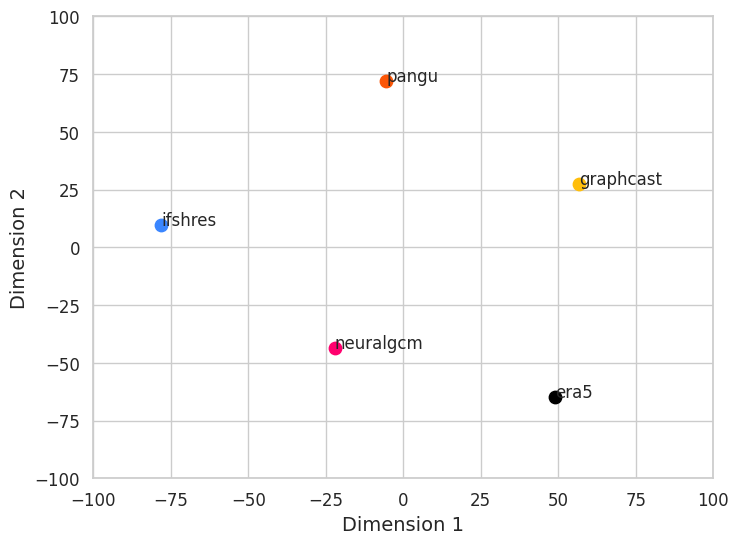

In [ ]:
plot_mds_coords(pairwise_rmse_result.index, color_dict, coords, data_drive_plot)

In [ ]:
# @title Distance to ERA5
# This section calculates the Euclidean distance of each model's MDS coordinates from the ERA5 coordinates and prints the results.
# Calculate the Euclidean distance of each model's coordinates from the ERA5 coordinates
distances = np.linalg.norm(coords - coords[0], axis=1)
model_names = ['ERA5', 'GraphCast', 'Pangu', 'NeuralGCM', 'IFSHRES']
for name, dist in zip(model_names, distances):
    print(f"{name:12s}: {dist:.2f}")

ERA5        : 0.00
GraphCast   : 92.37
Pangu       : 147.23
NeuralGCM   : 74.23
IFSHRES     : 147.27


In [ ]:
# @title Plot MDS with ERA5 as Reference
# This function plots the MDS coordinates with ERA5 as the reference point at the origin (0, 0).
def plot_mds_with_era5_as_reference(coords, labels, color_dict, save_path):
    # Translate coordinates so ERA5 is at the origin
    ref_coord = coords[0]
    translated_coords = coords - ref_coord  # ERA5 becomes (0, 0)


    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10

    plt.figure(figsize=(8, 6))

    for i, label in enumerate(labels):
        dataset_color = 'black' if 'era5' in label else next((color for key, color in color_dict.items() if key in label), None)
        if dataset_color is None:
            continue
        x, y = translated_coords[i]
        plt.scatter(x, y, color=dataset_color, edgecolors=dataset_color, alpha=1, s=80)
        plt.annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='left')

    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    # plt.title('MDS with ERA5 as Reference (72h Lead Time) 2020 Forecasts')
    plt.xlabel('Dimension 1 (relative to ERA5)')
    plt.ylabel('Dimension 2 (relative to ERA5)')
    # plt.xlim([-200, 200])
    # plt.ylim([-200, 200])
    plt.grid(True)
    plt.savefig(save_path + "MDS with ERA5 as Reference (72h Lead Time) 2020 Forecasts.pdf" , dpi=300, bbox_inches="tight")
    plt.show()



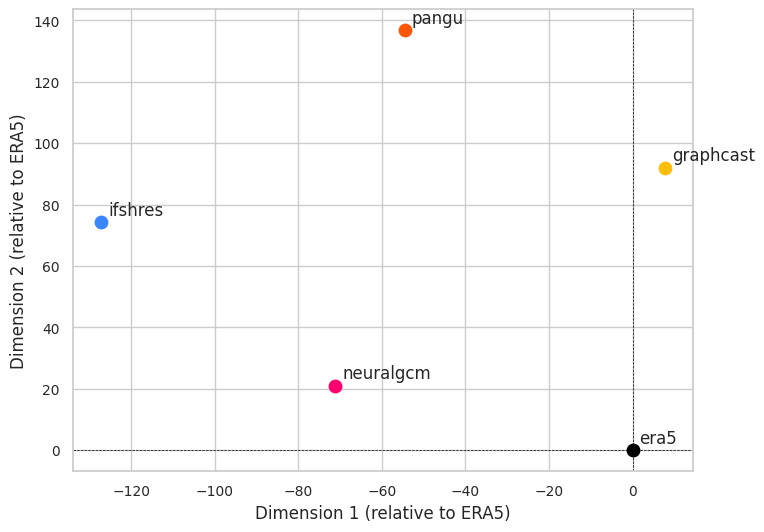

In [ ]:
plot_mds_with_era5_as_reference(coords, pairwise_rmse_result.index, color_dict,data_drive_plot )


In [ ]:
# @title Apply MDS using normalized stress
# This section applies MDS with normalized stress to the pairwise RMSE distance matrix.
mds_stress_1 = MDS(n_components=2, metric=True, n_init=4, max_iter=300, eps=1e-6,
                   n_jobs=-1,random_state=2,
                   dissimilarity='precomputed', normalized_stress=True
                   )
coords_stress_1 = mds_stress_1.fit_transform(distance_matrix)

In [ ]:
# @title Plot MDS with Normalized Stress
print(f'Normalised Stress: {mds_stress_1.stress_:.2f}')

Normalised Stress: 0.22


| Normalized Stress | Interpretation  |
| ----------------- | --------------- |
| ≤ 0.05            | Excellent fit   |
| 0.05–0.10         | Good fit        |
| 0.10–0.20         | Fair            |
| > 0.20            | Poor fit        |

In [31]:
coords_stress_1

array([[ 46.2201964 , -66.87642078],
       [ 57.87484486,  24.78784882],
       [ -2.47613752,  72.09187509],
       [-23.95545117, -42.75618013],
       [-77.66345257,  12.752877  ]])

index = 0 and label = era5
index = 1 and label = graphcast
index = 2 and label = pangu
index = 3 and label = neuralgcm
index = 4 and label = ifshres


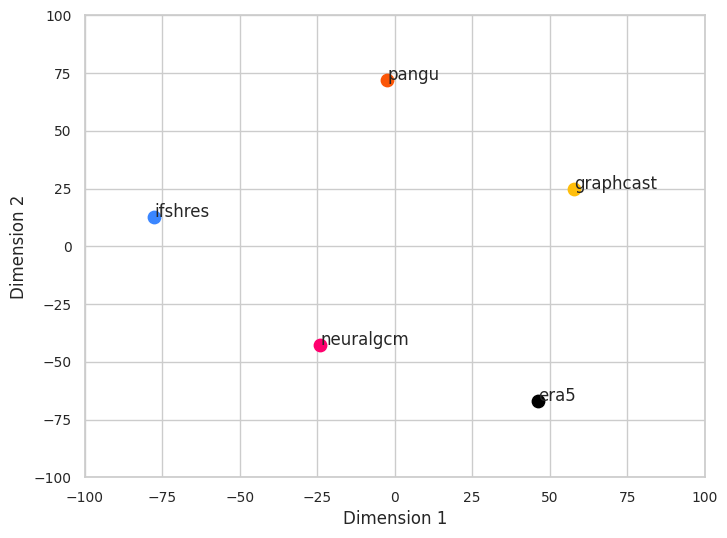

In [ ]:
plot_mds_coords(pairwise_rmse_result.index, color_dict, coords_stress_1, data_drive_plot)


In [ ]:
# @title Distance to ERA5 using Coord_strees_1
# This section calculates the Euclidean distance of each model's MDS coordinates with normalized stress from the ERA5 coordinates and prints the results.
# Calculate the Euclidean distance of each model's coordinates from the ERA5 coordinates
distances = np.linalg.norm(coords_stress_1 - coords_stress_1[0], axis=1)
model_names = ['ERA5', 'GraphCast', 'Pangu', 'NeuralGCM', 'IFSHRES']
for name, dist in zip(model_names, distances):
    print(f"{name:12s}: {dist:.2f}")

ERA5        : 0.00
GraphCast   : 92.40
Pangu       : 147.25
NeuralGCM   : 74.21
IFSHRES     : 147.27


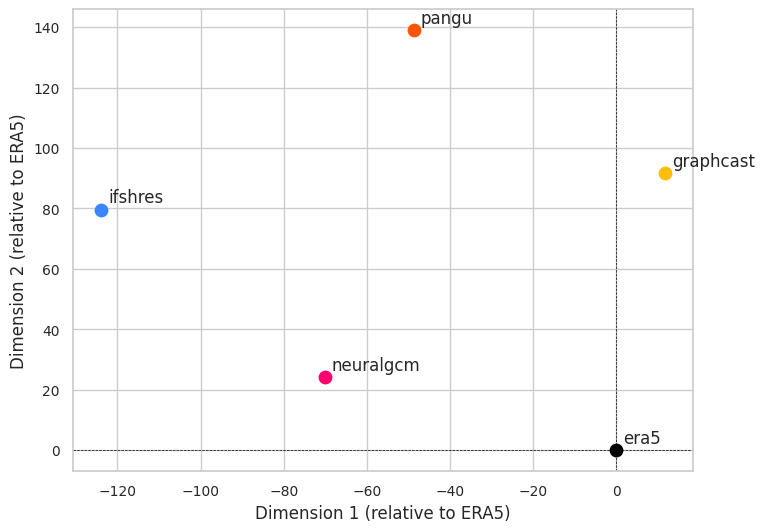

In [ ]:
plot_mds_with_era5_as_reference(coords_stress_1, pairwise_rmse_result.index, color_dict,data_drive_plot )


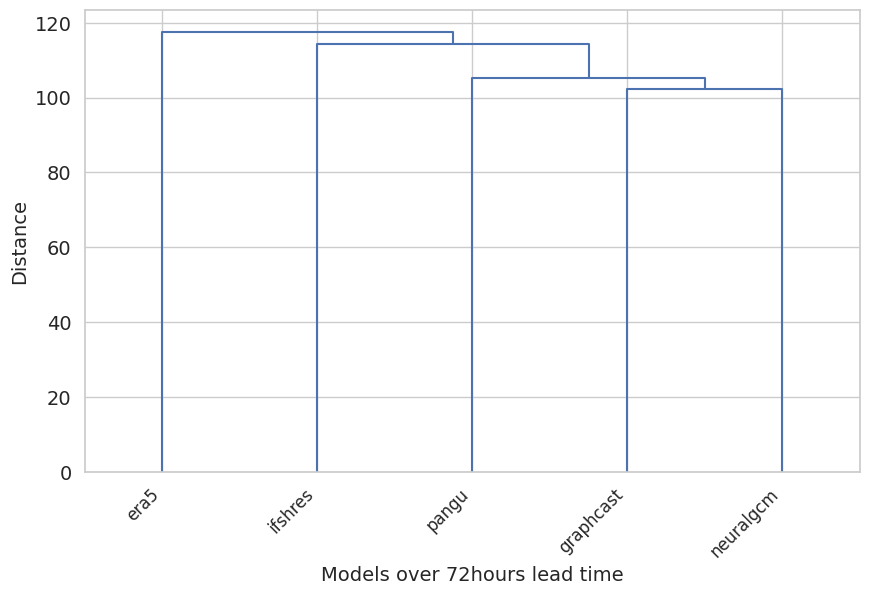

In [ ]:
# @title Create the dendrogram plot
# This section creates a dendrogram plot using hierarchical clustering on the pairwise RMSE results.
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Convert the DataFrame to a NumPy array
distance_matrix = pairwise_rmse_result.values

# Since the RMSE matrix is symmetric and represents distances,
# convert it to a condensed distance matrix
condensed_distance = squareform(distance_matrix)

# Compute the linkage matrix using a method of your choice (e.g., 'average')
Z = linkage(condensed_distance, method='average')

# Create the dendrogram plot
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.figure(figsize=(10, 6))

# plt.figure(figsize=(12, 8))
dendrogram(Z, labels=pairwise_rmse_result.index, leaf_rotation=90)
# plt.title('Hierarchical Clustering Dendrogram of Pairwise RMSE of Models(72h Lead Time)')
plt.xlabel('Models over 72hours lead time')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45° and align right


plt.savefig(data_drive_plot + f'Hierarchical Clustering Dendrogram of Pairwise RMSE of Models(72h Lead Time).pdf', dpi=300, bbox_inches="tight")

plt.show()


## Additional Exploration on the effect of the number of MDS components

In [ ]:
# @title 3D MDS
# This section applies MDS with normalized stress to the pairwise RMSE distance matrix and visualizes it in 3D.

columns_to_calculate_test = ['era5','graphcast', 'pangu', 'neuralgcm','ifshres']
pairwise_rmse_result_test = calculate_pairwise_rmse(df_not_null, columns_to_calculate_test)
print(pairwise_rmse_result_test)


mds_test = MDS(n_components=3,metric=True, n_init=4, max_iter=300, eps=1e-6,
                   n_jobs=-1,random_state=2,
                   dissimilarity='precomputed', normalized_stress=True)
coords_test = mds_test.fit_transform(pairwise_rmse_result_test)

                 era5   graphcast       pangu   neuralgcm     ifshres
era5              0.0  115.160156  125.908476  104.454006  124.894767
graphcast  115.160156         0.0  105.998268  102.279047  113.080117
pangu      125.908476  105.998268         0.0  104.273869  119.072937
neuralgcm  104.454006  102.279047  104.273869         0.0  111.085068
ifshres    124.894767  113.080117  119.072937  111.085068         0.0


In [ ]:
coords_test

array([[ 66.1740657 , -36.99755297,  20.84709648],
       [-12.94664768,  17.42822072,  60.34479249],
       [-70.13487389, -23.88421202,  -2.91455827],
       [  7.87251345, -28.40805445, -50.54019713],
       [  9.03494243,  71.86159872, -27.73713356]])

In [ ]:
print(f"Normalised stress: {mds_test.stress_:.4f}")


Normalised stress: 0.1031


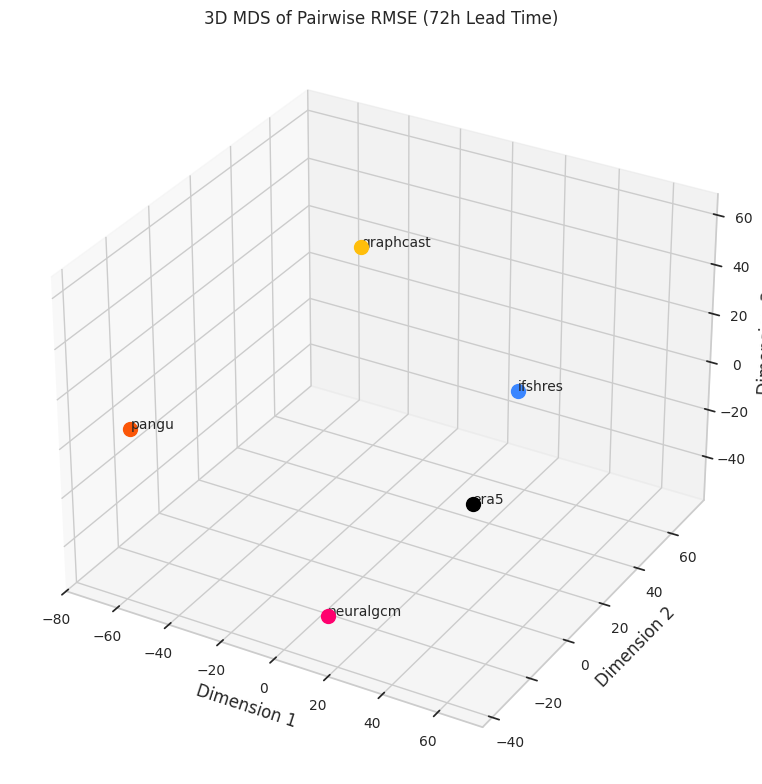

In [ ]:
# @title Plot 3D MDS
# This section plots the 3D MDS coordinates with annotations for each label.
from mpl_toolkits.mplot3d import Axes3D

labels = pairwise_rmse_result.index
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(labels):
    color = 'black' if 'era5' in label else color_dict.get(label, 'gray')
    ax.scatter(coords_test[i, 0], coords_test[i, 1], coords_test[i, 2],
               color=color, s=100)
    ax.text(coords_test[i, 0], coords_test[i, 1], coords_test[i, 2],
            label, fontsize=10)

ax.set_title('3D MDS of Pairwise RMSE (72h Lead Time)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.tight_layout()
plt.show()


In [ ]:
# @title Distance to ERA5
# This section calculates the Euclidean distance of each model's 3D MDS coordinates from the ERA5 coordinates and prints the results.
# Calculate the Euclidean distance of each model's coordinates from the ERA5 coordinates
distances = np.linalg.norm(coords_test - coords_test[0], axis=1)
model_names = ['ERA5', 'GraphCast', 'Pangu', 'NeuralGCM', 'IFSHRES']
for name, dist in zip(model_names, distances):
    print(f"{name:12s}: {dist:.2f}")


ERA5        : 0.00
GraphCast   : 103.84
Pangu       : 138.98
NeuralGCM   : 92.57
IFSHRES     : 132.20


In [ ]:
# @title Plot 3D MDS with Plotly
# This section uses Plotly to create an interactive 3D scatter plot of the MDS coordinates.
import plotly.graph_objs as go

trace = go.Scatter3d(
    x=coords_test[:, 0],
    y=coords_test[:, 1],
    z=coords_test[:, 2],
    mode='markers+text',
    text=labels,
    textposition='top center',
    marker=dict(
        size=6,
        color=[color_dict.get(label, 'gray') if label != 'era5' else 'black' for label in labels]
    )
)

layout = go.Layout(
    title='3D MDS of Pairwise RMSE (72h Lead Time)',
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    )
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


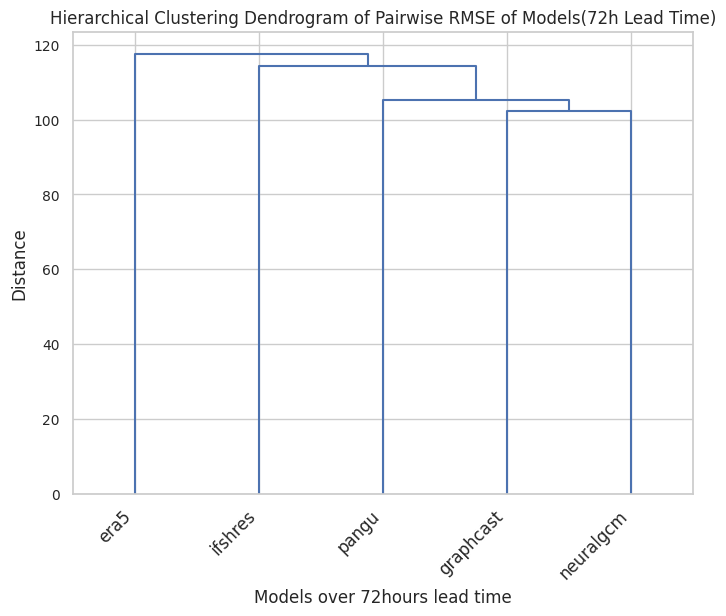

In [ ]:
# @title Create the dendrogram plot
# This section creates a dendrogram plot using hierarchical clustering on the pairwise RMSE results for the 3D MDS coordinates.
# Convert the DataFrame to a NumPy array
distance_matrix = pairwise_rmse_result_test.values

# If your RMSE matrix is symmetric and represents distances,
# convert it to a condensed distance matrix
condensed_distance = squareform(distance_matrix)

# Compute the linkage matrix using a method of your choice (e.g., 'average')
Z = linkage(condensed_distance, method='average')

# Create the dendrogram plot
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.figure(figsize=(8, 6))

# plt.figure(figsize=(12, 8))
dendrogram(Z, labels=pairwise_rmse_result_test.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram of Pairwise RMSE of Models(72h Lead Time)')
plt.xlabel('Models over 72hours lead time')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45° and align right


plt.savefig(data_drive_plot+f'Hierarchical Clustering Dendrogram of Pairwise RMSE of Models(72h Lead Time).pdf', dpi=300, bbox_inches="tight")

plt.show()


Components= 1: Stress=0.4834428152292752
Components= 2: Stress=0.2150907673602808
Components= 3: Stress=0.10312343478305917
Components= 4: Stress=0.001121849906457741
Components= 5: Stress=0.0011219742709859888
Components= 6: Stress=0.0011106239873135107
Components= 7: Stress=0.0011916217999058776
Components= 8: Stress=0.001059646853567836
Components= 9: Stress=0.001253361939383478
Components= 10: Stress=0.0011675854162128477


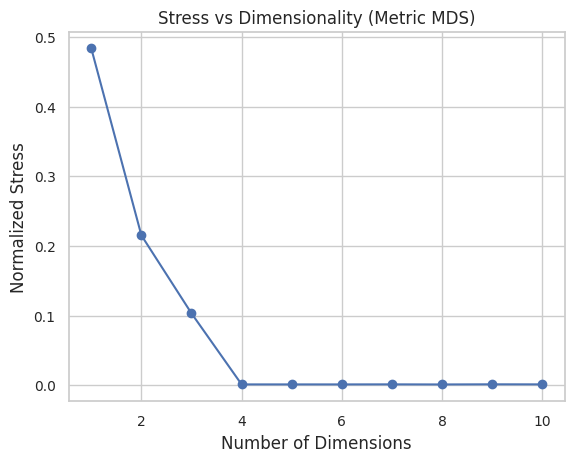

In [ ]:
# @title Investigating the number of components with the least normalized stress
# This section investigates the number of components in MDS that yield the least normalized stress.
dims = list(range(1, 11))
stresses = []

for p in dims:
    mds_stress_1 = MDS(n_components=p, metric=True, n_init=4, max_iter=300, eps=1e-6,
                   n_jobs=-1,random_state=2,
                   dissimilarity='precomputed', normalized_stress=True
                   )
    coords_stress_1 = mds_stress_1.fit_transform(distance_matrix)
    print(f'Components= {p}: Stress={mds_stress_1.stress_}')
    stresses.append(mds_stress_1.stress_)

plt.plot(dims, stresses, marker='o')
plt.xlabel("Number of Dimensions")
plt.ylabel("Normalized Stress")
plt.title("Stress vs Dimensionality (Metric MDS)")
plt.grid(True)
plt.show()